In [ ]:
import duckdb as dk
import pandas as pd
import matplotlib.pyplot as plt
con = dk.connect(database='data/vermont.duckdb', read_only=False)

In [4]:
query = """
SELECT * FROM locality_lookup
"""
df = con.execute(query).fetchdf()
df.head(10)

,locality,locality_id,locality_type,latitude,longitude,total_checklists
0,Shelburne Bay,165354,H,44.402908,-73.232368,5778
1,Delta Park IBA,165376,H,44.533363,-73.277771,5412
2,Charlotte Town Beach,164833,H,44.334270,-73.281357,3790
3,"Moose Bog, Wenlock WMA",207476,H,44.764008,-71.739410,3667
4,Colchester Pond - Colchester (186 acres),751908,H,44.554634,-73.119843,3566
5,Herrick's Cove IBA,165635,H,43.178577,-72.446640,3276
6,Wilder Dam--boat ramp,687022,H,43.674469,-72.303001,3179
7,Berlin Pond IBA - Berlin (293 acres),150998,H,44.189919,-72.587509,3041
8,North Branch Nature Center,166319,H,44.285198,-72.574600,2775
9,Dead Creek WMA IBA--Brilyea Access,201059,H,44.074551,-73.350998,2759


In [2]:
query = """
SELECT *
FROM locality_lookup
WHERE locality LIKE 'Colchester Pond%'
"""
df = con.execute(query).fetchdf()
df

,locality,locality_id,locality_type,latitude,longitude,total_checklists
0,Colchester Pond - Colchester (186 acres),751908,H,44.554634,-73.119843,3566


<BarContainer object of 53 artists>

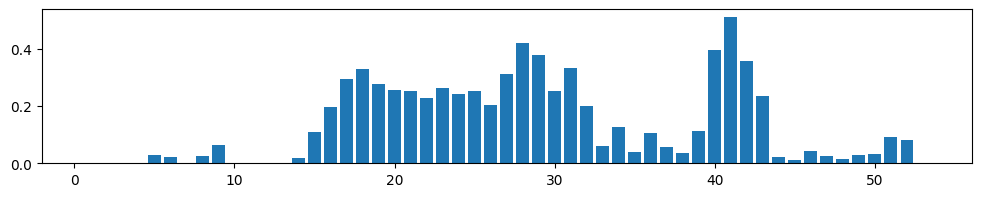

In [63]:
hotspot_id = 751908 # Colchester Pond
species_name = 'Hermit Thrush'
ONE_YEAR = pd.DataFrame({'day_of_year': range(1, 367)})

query = """
SELECT day_of_year, frequency
FROM detection_frequencies
WHERE locality_id = ? AND common_name = ?
ORDER BY day_of_year
"""

df = con.execute(query, [hotspot_id, species_name]).fetchdf()

df_full = ONE_YEAR.merge(df, on='day_of_year', how='left').fillna(0)
df_full['week'] = ((df_full['day_of_year'] - 1 ) // 7) + 1
weekly_avg = df_full.groupby('week')['frequency'].mean().reset_index()

plt.figure(figsize=(12,2))
plt.bar(weekly_avg['week'], weekly_avg['frequency'])


In [ ]:
life_list = con.execute("""SELECT * FROM life_list""").to_df()